In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import FormatStrFormatter

### Monolithic Pipeline

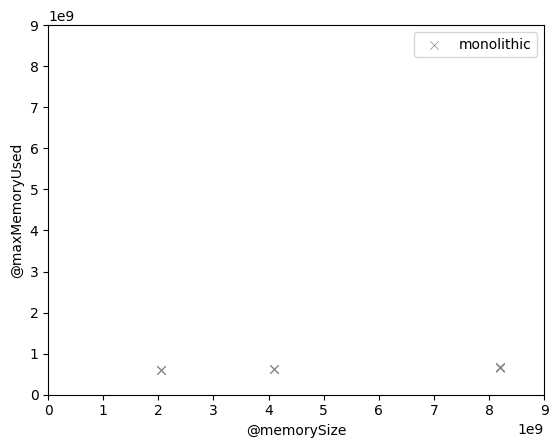

In [36]:
DATAPATH = "./log-insight-data/"
RUN = "pipeline-app-step-noS3"
stage="monolithic"
manualSplitColors = {'crop': 'b', 'scaledown':'g', 'mirror':'r', 'bw':'c', 'rotate':'m', 'watermark': 'y'}
fig, ax = plt.subplots()
memUsageDF = pd.read_csv(DATAPATH+RUN+".csv", usecols=["@maxMemoryUsed", "@memorySize"])
sns.scatterplot(memUsageDF, x="@memorySize", y="@maxMemoryUsed", color="grey", label="{}".format(stage), marker='x')

ax.set_xlim(0, 90*1e8)
ax.set_ylim(0, 90*1e8)
plt.legend()
plt.show()

In [31]:
memUsageDF

,@maxMemoryUsed,@memorySize
0,613000000.0,2.048000e+09
1,592000000.0,2.048000e+09
2,613000000.0,2.048000e+09
3,614000000.0,2.048000e+09
4,611000000.0,2.048000e+09
5,622000000.0,4.096000e+09
6,629000000.0,4.096000e+09
7,628000000.0,4.096000e+09
8,627000000.0,4.096000e+09
9,629000000.0,4.096000e+09


### Manual Splitting Memory Utilisation

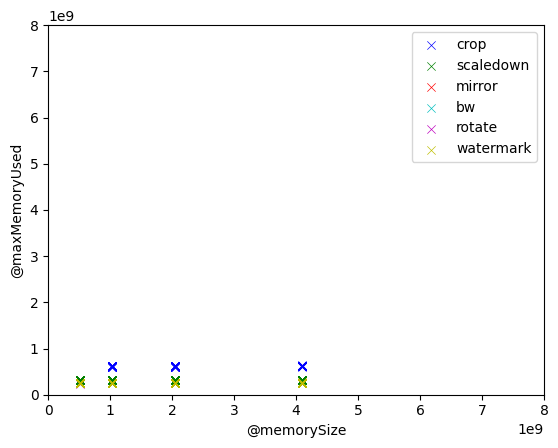

In [32]:
DATAPATH = "./log-insight-data/"
RUN = "profile-step-split-num30-v5/"
manualSplitColors = {'crop': 'b', 'scaledown':'g', 'mirror':'r', 'bw':'c', 'rotate':'m', 'watermark': 'y'}
fig, ax = plt.subplots()
for stage, col in manualSplitColors.items():
    memUsageDF = pd.read_csv(DATAPATH+RUN+stage+".csv", usecols=["@maxMemoryUsed", "@memorySize"])
    sns.scatterplot(memUsageDF, x="@memorySize", y="@maxMemoryUsed", color=col, label="{}".format(stage), marker='x')

ax.set_xlim(0, 80*1e8)
ax.set_ylim(0, 80*1e8)
plt.legend()
plt.show()

### Smart Splitting Memory Utilisation

crop done
scaledown done
mirror_bw_rotate_watermark done


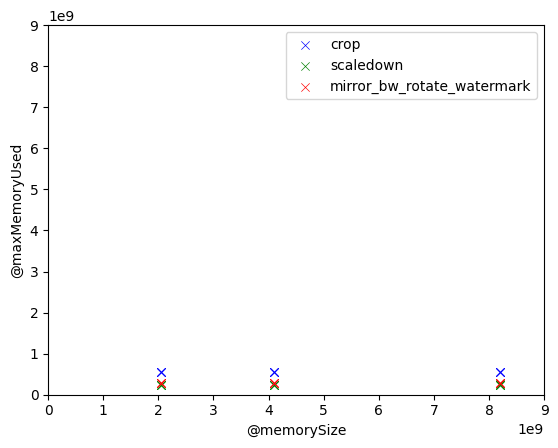

In [55]:
smartSplitColors = {'crop': 'b', 'scaledown':'g', 'mirror_bw_rotate_watermark':'r'}

DATAPATH = "./log-insight-data/"
RUN = "profile-step-agg-8min-v6/"
fig, ax = plt.subplots()
for stage, col in smartSplitColors.items():
    memUsageDF = pd.read_csv(DATAPATH+RUN+stage+".csv", usecols=["@maxMemoryUsed", "@memorySize"])
    sns.scatterplot(memUsageDF[5:], x="@memorySize", y="@maxMemoryUsed", color=col, label="{}".format(stage), marker='x')
    print(stage, "done")
ax.set_xlim(0, 90*1e8)
ax.set_ylim(0, 90*1e8)
plt.legend()
plt.show()

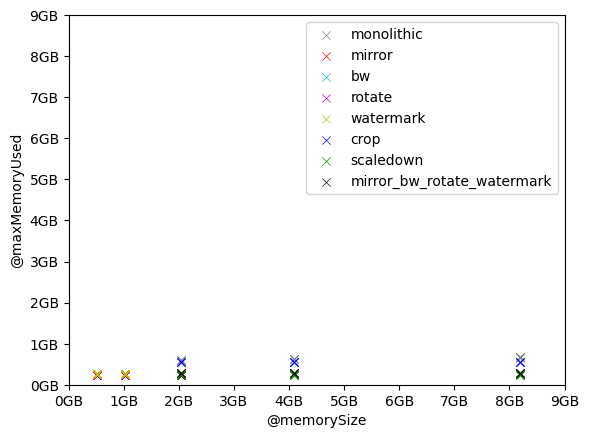

In [64]:
DATAPATH = "./log-insight-data/"
RUN = "pipeline-app-step-noS3"
stage="monolithic"
manualSplitColors = {'crop': 'b', 'scaledown':'g', 'mirror':'r', 'bw':'c', 'rotate':'m', 'watermark': 'y'}
fig, ax = plt.subplots()
memUsageDF = pd.read_csv(DATAPATH+RUN+".csv", usecols=["@maxMemoryUsed", "@memorySize"])/1e9
sns.scatterplot(memUsageDF, x="@memorySize", y="@maxMemoryUsed", color="grey", label="{}".format(stage), marker='x')



DATAPATH = "./log-insight-data/"
RUN = "profile-step-split-num30-v5/"
# manualSplitColors = {'crop': 'b', 'scaledown':'g', 'mirror':'r', 'bw':'c', 'rotate':'m', 'watermark': 'y'}
manualSplitColors = {'mirror':'r', 'bw':'c', 'rotate':'m', 'watermark': 'y'}
for stage, col in manualSplitColors.items():
    memUsageDF = pd.read_csv(DATAPATH+RUN+stage+".csv", usecols=["@maxMemoryUsed", "@memorySize"])/1e9
    sns.scatterplot(memUsageDF, x="@memorySize", y="@maxMemoryUsed", color=col, label="{}".format(stage), marker='x')

smartSplitColors = {'crop': 'b', 'scaledown':'g', 'mirror_bw_rotate_watermark':'black'}
DATAPATH = "./log-insight-data/"
RUN = "profile-step-agg-8min-v6/"
# fig, ax = plt.subplots()
for stage, col in smartSplitColors.items():
    memUsageDF = pd.read_csv(DATAPATH+RUN+stage+".csv", usecols=["@maxMemoryUsed", "@memorySize"])/1e9
    sns.scatterplot(memUsageDF[5:], x="@memorySize", y="@maxMemoryUsed", color=col, label="{}".format(stage), marker='x')
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%dGB'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%dGB'))
plt.legend()
plt.show()